# Working with Audio Data in Python

Audio processing in Python is a vast field with numerous applications, from speech recognition to music analysis. In this guide, we will delve into how to work with audio data using the `librosa` and `matplotlib` libraries. We will cover:

1. Loading and playing audio files.
2. Plotting waveforms in the time domain.
3. Visualizing audio data in the frequency domain.
4. Creating spectrograms.
5. Additional relevant topics for audio analysis.

## Prerequisites

Before we start, make sure you have the necessary libraries installed. You can install them using pip:

```sh
pip install matplotlib librosa numpy
```

## Loading Audio Data

We'll start by loading an audio file using `librosa`. For this guide, we'll use `example.mp3` as our audio file.

In [4]:
# !pip install librosa

In [3]:
# !pip install librosa
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
audio_path = 'example.mp3'
y, sr = librosa.load(audio_path, sr=None)

Here:
- `y` is a NumPy array containing the audio time series.
- `sr` is the sample rate of the audio file.

## Playing Audio (Optional)

While not necessary for visualization, you might want to play the audio to understand what you are working with. For this, you can use the `IPython.display` module in a Jupyter notebook:

In [5]:
from IPython.display import Audio

# Play the loaded audio
Audio(data=y, rate=sr)

## Plotting Waveforms in the Time Domain

A waveform is a graph that represents the variation of a signal in time. To plot the waveform, we use `matplotlib`.

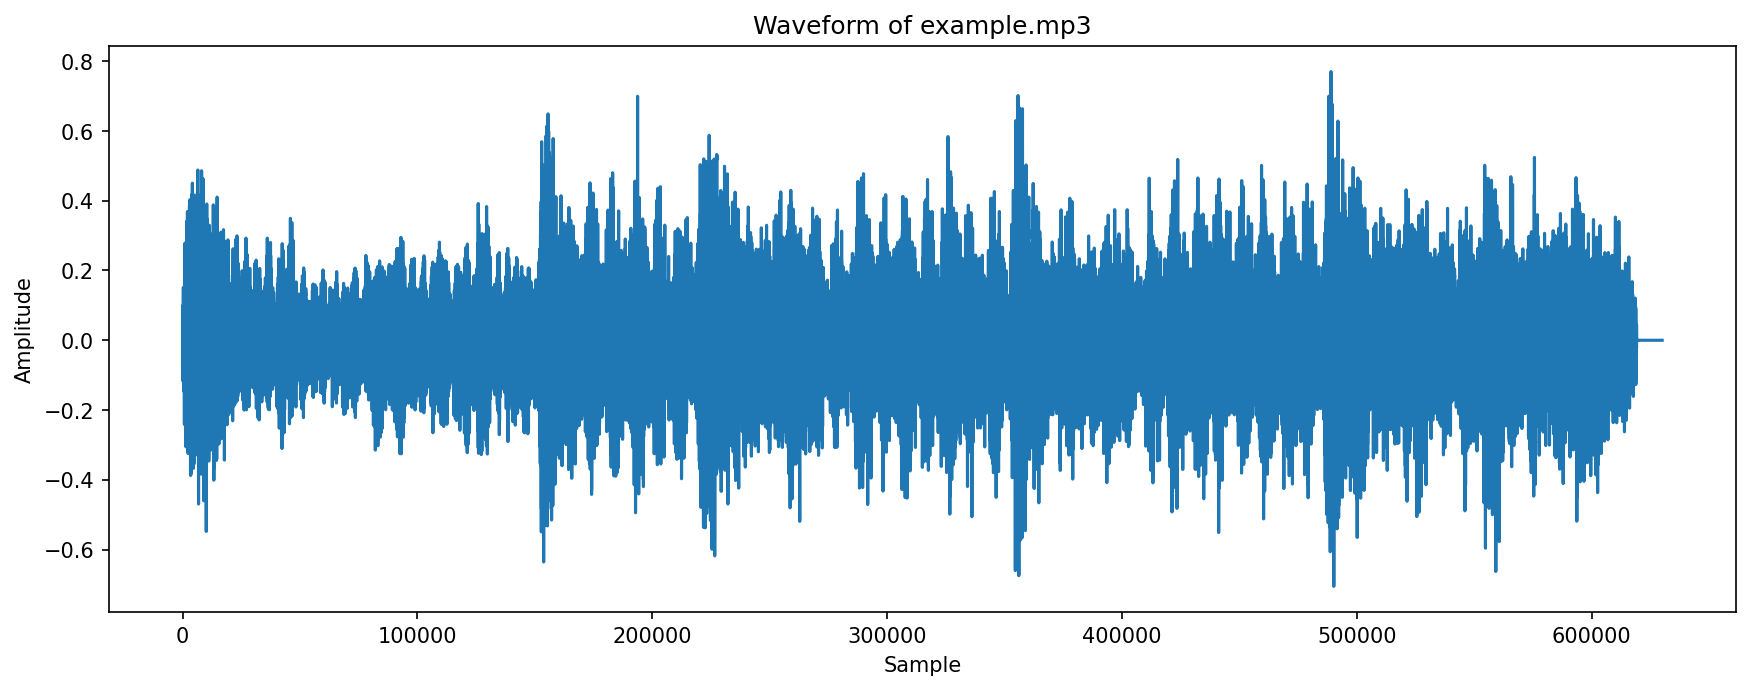

In [26]:
plt.figure(figsize=(14, 5),dpi=150)
plt.plot(y)
plt.title('Waveform of example.mp3')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

In this plot:
- The x-axis represents time (in terms of samples).
- The y-axis represents amplitude.

## Visualizing Audio Data in the Frequency Domain

In [22]:
sr

48000

In [23]:
len(y)

630031

In [17]:
three_seconds = sr*3

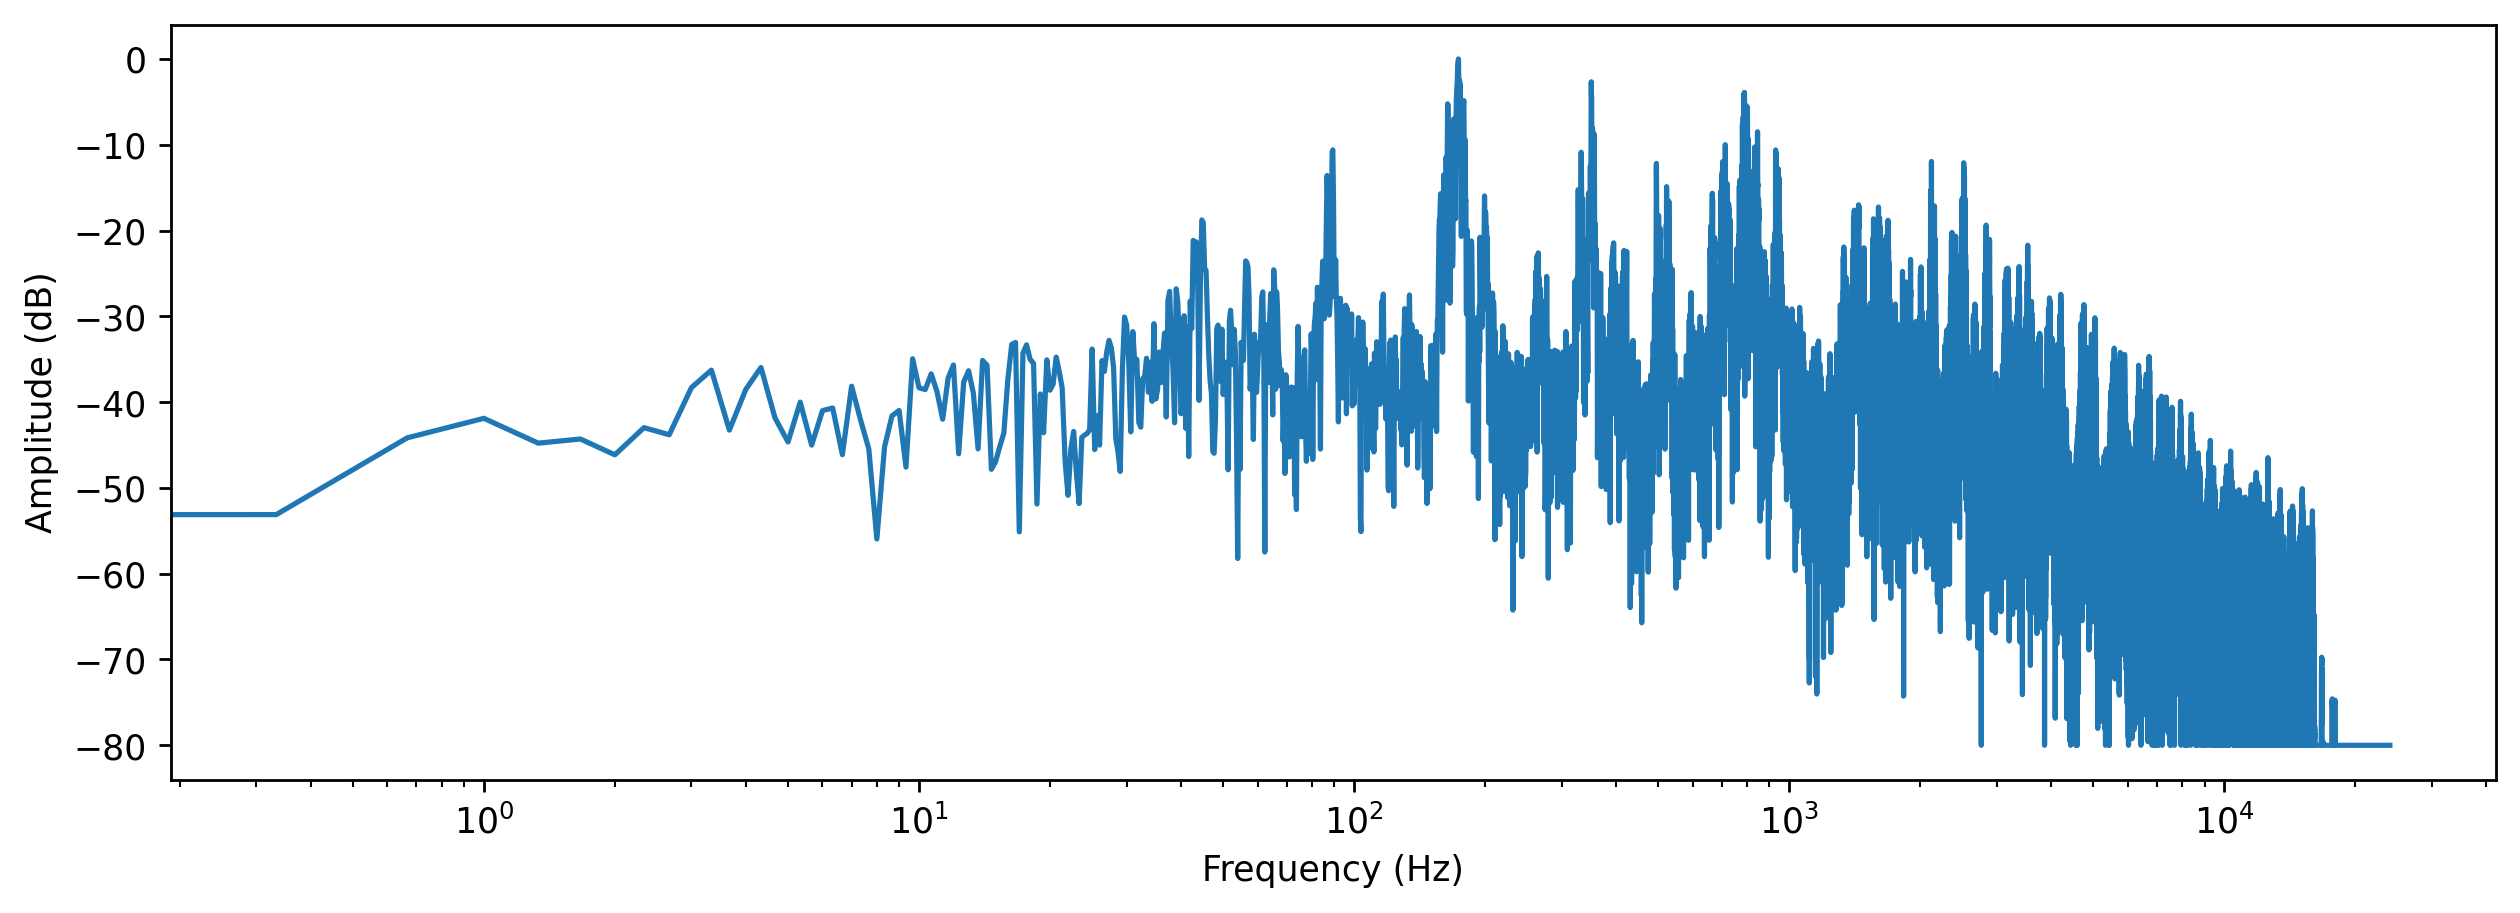

In [25]:
import numpy as np

dft_input = y[:three_seconds]

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sr, n_fft=len(dft_input))

plt.figure(dpi=250).set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

## Creating Spectrograms

A spectrogram is a visual representation of the spectrum of frequencies in a signal as it varies with time. It's a powerful tool for understanding the structure of audio data.

To analyze the frequency components of the audio signal, we use the Short-Time Fourier Transform (STFT). The STFT splits the signal into overlapping windows and computes the Fourier Transform for each window.

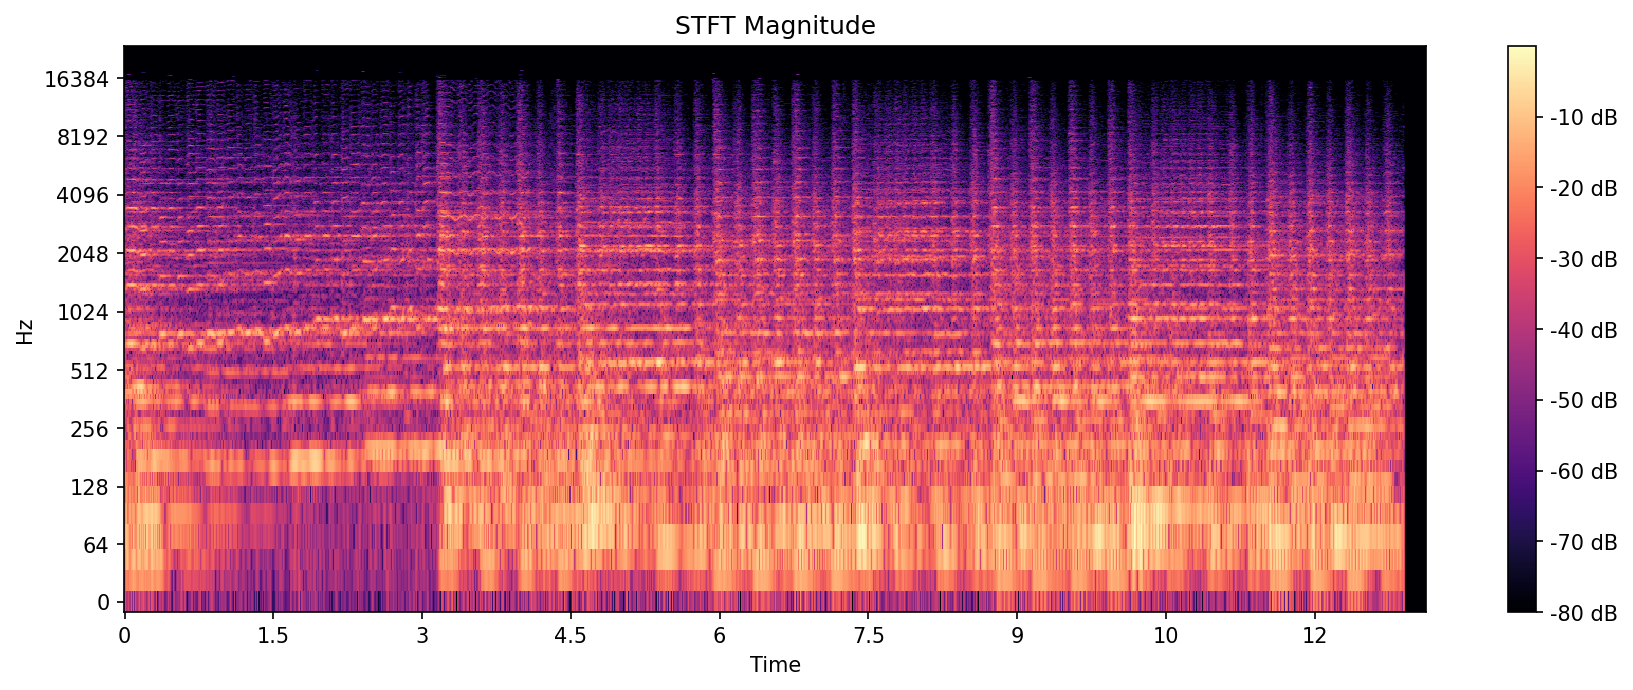

In [27]:
# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(y)

# Convert the amplitude to dB scale
D_dB = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot the STFT
plt.figure(figsize=(14, 5),dpi=150)
librosa.display.specshow(D_dB, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Magnitude')
plt.show()

In this plot:
- The x-axis represents time.
- The y-axis represents frequency (logarithmic scale).
- The color intensity represents amplitude in dB.


A mel spectrogram is a specialized form of spectrogram widely utilized in speech processing and machine learning. While it also displays the frequency content of an audio signal over time, it uses a different frequency axis compared to a standard spectrogram.

In a conventional spectrogram, the frequency axis is linear and measured in hertz (Hz). However, the human ear is more attuned to variations in lower frequencies, with sensitivity diminishing logarithmically at higher frequencies. The mel scale reflects this perceptual characteristic, aligning more closely with how humans hear.

To generate a mel spectrogram, the Short-Time Fourier Transform (STFT) is applied to segment the audio into short intervals, producing a sequence of frequency spectra. These spectra are then processed through a mel filterbank, converting the frequencies to the mel scale.

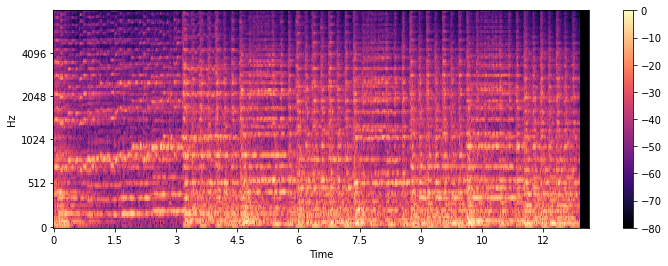

In [12]:

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sr, fmax=8000)
plt.colorbar()